In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
# Had to convert the txt file I downloaded into a csv

read_file = pd.read_csv ('/Users/luciaranallo/Desktop/breast-cancer.data')
#/Users/luciaranallo/Desktop/breast-cancer.csv.data
read_file.to_csv ('/Users/luciaranallo/Documents/Utah Fall 2022/Intro Programming 6018/Python Code/Melt, Pivot, Aggregations, and Iteration.csv', index=None)

In [10]:
# imported the dataset as a csv and named it data

data = pd.read_csv('/Users/luciaranallo/Documents/Utah Fall 2022/Intro Programming 6018/Python Code/Melt, Pivot, Aggregations, and Iteration.csv')
data.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [11]:
# Based on the Attribute information I renamed each of the columns 
# I also added an entry column so that each row had a unique identifier to be used later

data.columns=['Class','Age','Menopause','TumorSize','Inv-Nodes','Node-Caps','Deg-Malig','Breast','Breast-Quad','Irradiat']
data["Entry"] = range(0,len(data))
data.head()

,Class,Age,Menopause,TumorSize,Inv-Nodes,Node-Caps,Deg-Malig,Breast,Breast-Quad,Irradiat,Entry
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,1
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,2
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,3
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no,4


## Bar Graph

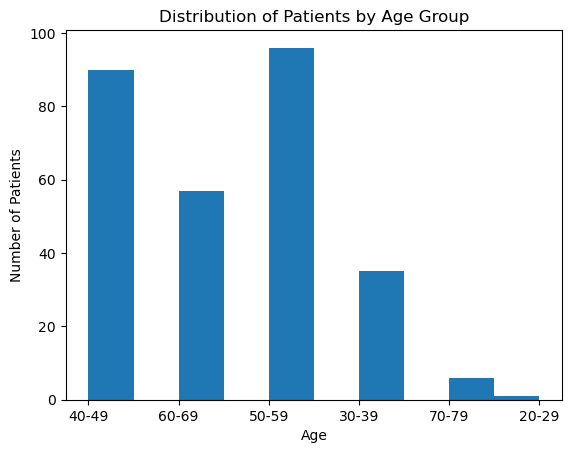

In [37]:
plt.hist("Age", data = data)
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients by Age Group")

plt.show()

# With this graph we can see how the patients are distributed across the different age groups in the dataset
# We can see that the 40-49 and 50-59 age groups have the largest number of patients

## Pie Chart

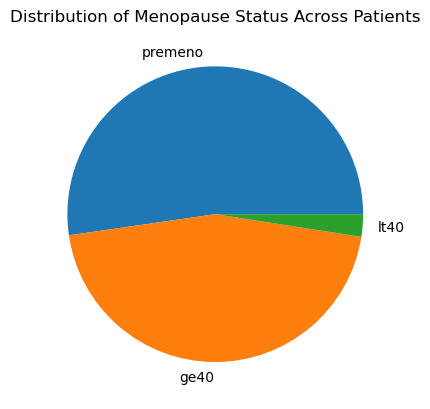

In [34]:
mylabels = np.array(["premeno","ge40","lt40"])

premeno = sum(data.Menopause == "premeno")
ge40 = sum(data.Menopause == "ge40")
lt40 = sum(data.Menopause == "lt40")

menovalues = [premeno,ge40,lt40]

plt.pie(menovalues, labels=mylabels)
plt.title("Distribution of Menopause Status Across Patients")
plt.show()

# With this graph we can see how the menopause status varies across the group of patients
# We can see that almost all of the patients are either premenopause or ge40

## Stacked Bar Graph

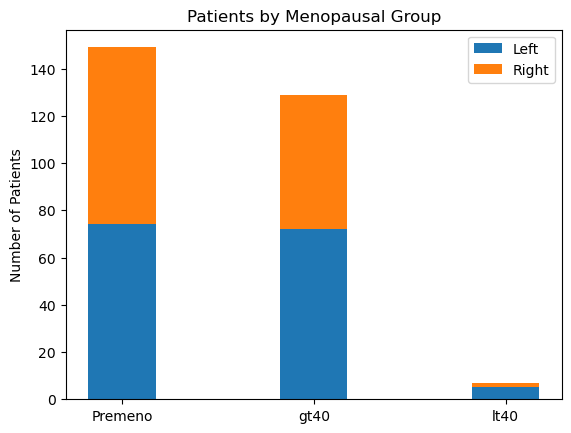

In [48]:
labels = ["Premeno","gt40","lt40"]
left = sum((data.Menopause == "premeno") & (data.Breast == "left"))
left1 = sum((data.Menopause == "ge40") & (data.Breast == "left"))
left2 = sum((data.Menopause == "lt40") & (data.Breast == "left"))
right = sum((data.Menopause == "premeno") & (data.Breast == "right"))
right1 = sum((data.Menopause == "ge40") & (data.Breast == "right"))
right2 = sum((data.Menopause == "lt40") & (data.Breast == "right"))

Left = [left,left1,left2]
Right = [right,right1,right2]
width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, Left, width, label='Left')
ax.bar(labels, Right, width, bottom=Left,
       label='Right')

ax.set_ylabel('Number of Patients')
ax.set_title('Patients by Menopausal Group')
ax.legend()

plt.show()

# With this graph we can again see the patients distributed by Menopausal group, however, we can also see how the distribution of where their tumor is compares.
# We can see that it is pretty evenly split between Left and Right in each of the groups. 

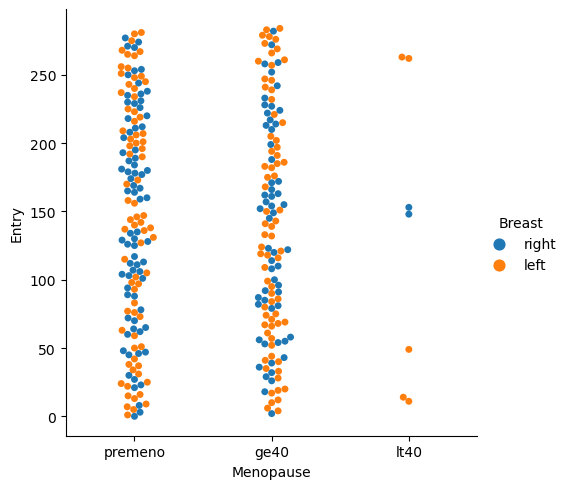

In [61]:
# Categorical Scatterplot
sns.catplot(data=data, x="Menopause", y="Entry", hue="Breast", kind="swarm")

# With this graph we can see similar output as above, however the datapoints are individual rather than in a bar
# We can still see even distribution of the Right and Left categorires however we don't know how the number of datapoints compares as easily between the premeno and ge40 groups

## Box Plot

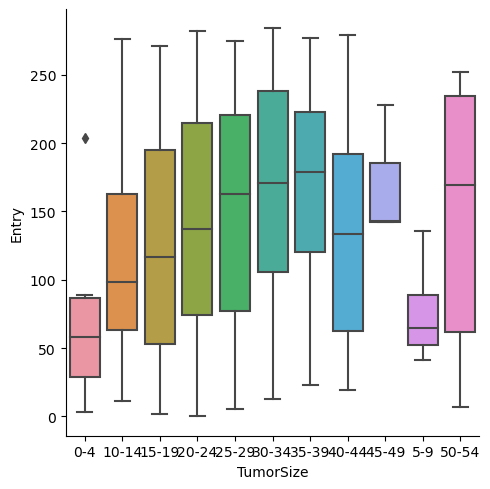

In [60]:
sns.catplot(data=data.sort_values("TumorSize"), x="TumorSize", y="Entry", kind="box")

# With this plot we can see how the number of patients within each of the tumor size groups varies
# We can see that the large rectange represents the number of entries while the line represents the median entry